# Airbnb Analysis

Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv(r"E:\Data science\Data csv\mongoDB\sample_airbnb.listingsAndReviews.csv")

#### check shape of dataset

In [3]:
df.shape

(5555, 3361)

In [4]:

# List of columns to keep (replace with your desired column names)
columns_to_keep = ['_id', 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'property_type',
 'room_type',
 'bed_type',
 'minimum_nights',
 'maximum_nights',
 'cancellation_policy',
 'last_scraped',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'accommodates',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'bathrooms',
 'price',
'address.street']

# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_keep]

# Save the new DataFrame to a CSV file
output_file_path = r'E:\Data science\Data csv\mongoDB\selected_columns.csv'
df_selected.to_csv(output_file_path, index=False)
df_selected

,_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,calendar_last_scraped,first_review,last_review,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,address.street
0,10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,"Cot - 10 € / night Dog - € 7,5 / night",...,2019-02-16T05:00:00.000Z,2016-01-03T05:00:00.000Z,2019-01-20T05:00:00.000Z,8,3.0,5.0,51,1.0,80.0,"Porto, Porto, Portugal"
1,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",NaN,"I´ll be happy to help you with any doubts, tip...",...,2019-02-11T05:00:00.000Z,NaN,NaN,4,1.0,2.0,0,1.0,317.0,"Rio de Janeiro, Rio de Janeiro, Brazil"
2,1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,NaN,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis","We try our best at creating, simple responsive...",...,2019-03-06T05:00:00.000Z,2013-05-24T04:00:00.000Z,2019-02-07T05:00:00.000Z,2,1.0,1.0,96,1.0,115.0,"Honolulu, HI, United States"
3,10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,NaN,Here exists a very cozy room for rent in a sha...,NaN,NaN,NaN,NaN,NaN,...,2019-03-06T05:00:00.000Z,2016-01-31T05:00:00.000Z,2016-01-31T05:00:00.000Z,1,1.0,1.0,1,1.5,40.0,"Brooklyn, NY, United States"
4,10030955,Apt Linda Vista Lagoa - Rio,Quarto com vista para a Lagoa Rodrigo de Freit...,NaN,Quarto com vista para a Lagoa Rodrigo de Freit...,NaN,NaN,NaN,NaN,NaN,...,2019-02-11T05:00:00.000Z,NaN,NaN,2,1.0,1.0,0,2.0,701.0,"Rio de Janeiro, Rio de Janeiro, Brazil"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9983221,Cozy apartment downtown Porto,"Renovated, fully equipped, within walking dist...",Very confortable apartment. Ideal for a long w...,"Renovated, fully equipped, within walking dist...",Just in the street 50 meters from the apartmen...,The apartment is in the 2nd floor without elev...,You have the metro nearby (Lapa Station) the w...,The whole apartment.,You can contact me by email or phone.,...,2019-02-16T05:00:00.000Z,2016-01-03T05:00:00.000Z,2019-02-07T05:00:00.000Z,4,1.0,2.0,107,1.0,58.0,"Porto, Porto, Portugal"
5551,9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,NaN,NaN,NaN,NaN,...,2019-02-18T05:00:00.000Z,NaN,NaN,2,2.0,3.0,0,1.0,501.0,"Kadıköy, İstanbul, Turkey"
5552,9987200,The best suite in Copacabana (total privacy),Excellent private suite with bathroom at the A...,"Beautiful suite with two beds, fridge, cable T...",Excellent private suite with bathroom at the A...,Copacabana beach is located in a district of t...,El aparcamiento puede ser utilizado a través ...,"El Apart está muy bien comunicado con metro, a...",The check in time is after 2 PM and check out ...,I meet the guests for handover the keys but in...,...,2019-02-11T05:00:00.000Z,2016-01-06T05:00:00.000Z,2019-01-27T05:00:00.000Z,3,1.0,3.0,90,1.0,101.0,"Rio de Janeiro, Rio de Janeiro, Brazil"
5553,9990304,March Madness Special! Aina Nalu Platinum D107,Walk out to Saltwater Infinity Pool! Call us N...,We invite you to come and stay in our upgraded...,Walk out to Saltwater Infinity Pool! Call us N...,-Lo

# Here I remove all Unnecessary columns and use necessary columns

##### Loading Dataset

In [5]:
df = pd.read_csv(r"E:\Data science\Data csv\mongoDB\selected_columns.csv")

### Data preprocessing

In [6]:
df.head(3)

,_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,calendar_last_scraped,first_review,last_review,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,address.street
0,10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,"Cot - 10 € / night Dog - € 7,5 / night",...,2019-02-16T05:00:00.000Z,2016-01-03T05:00:00.000Z,2019-01-20T05:00:00.000Z,8,3.0,5.0,51,1.0,80.0,"Porto, Porto, Portugal"
1,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",NaN,"I´ll be happy to help you with any doubts, tip...",...,2019-02-11T05:00:00.000Z,NaN,NaN,4,1.0,2.0,0,1.0,317.0,"Rio de Janeiro, Rio de Janeiro, Brazil"
2,1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,NaN,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis","We try our best at creating, simple responsive...",...,2019-03-06T05:00:00.000Z,2013-05-24T04:00:00.000Z,2019-02-07T05:00:00.000Z,2,1.0,1.0,96,1.0,115.0,"Honolulu, HI, United States"


In [7]:
df.tail(3)

,_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,calendar_last_scraped,first_review,last_review,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,address.street
5552,9987200,The best suite in Copacabana (total privacy),Excellent private suite with bathroom at the A...,"Beautiful suite with two beds, fridge, cable T...",Excellent private suite with bathroom at the A...,Copacabana beach is located in a district of t...,El aparcamiento puede ser utilizado a través ...,"El Apart está muy bien comunicado con metro, a...",The check in time is after 2 PM and check out ...,I meet the guests for handover the keys but in...,...,2019-02-11T05:00:00.000Z,2016-01-06T05:00:00.000Z,2019-01-27T05:00:00.000Z,3,1.0,3.0,90,1.0,101.0,"Rio de Janeiro, Rio de Janeiro, Brazil"
5553,9990304,March Madness Special! Aina Nalu Platinum D107,Walk out to Saltwater Infinity Pool! Call us N...,We invite you to come and stay in our upgraded...,Walk out to Saltwater Infinity Pool! Call us N...,-Located in the heart of Lahaina town and a sh...,Onsite parking at Aina Nalu is available for $...,You can walk to most attractions within Lahain...,NaN,We do most of our interaction through emails a...,...,2019-03-06T05:00:00.000Z,2015-08-17T04:00:00.000Z,2018-08-06T04:00:00.000Z,6,2.0,3.0,13,2.0,227.0,"Lahaina, HI, United States"
5554,9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"***NOTE: THE OCEAN INFINITY POOL (""POOL 1""0 WI...",Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,Puamana Resort requires a $10/day resort fee w...,You can walk to most attractions within Lahain...,Guests will have access to the 3 pools in the ...,We do most of our interaction through emails a...,...,2019-03-06T05:00:00.000Z,2016-04-06T04:00:00.000Z,2018-08-20T04:00:00.000Z,6,2.0,4.0,15,2.0,220.0,"Lahaina, HI, United States"


### Shape of the dataset

In [8]:
df.shape

(5555, 28)

##### columns of the dataset

In [9]:
df.columns

Index(['_id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'price', 'address.street'],
      dtype='object')

##### Datatypes of the dataset

In [10]:
df.dtypes

_id                        int64
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
notes                     object
transit                   object
access                    object
interaction               object
house_rules               object
property_type             object
room_type                 object
bed_type                  object
minimum_nights             int64
maximum_nights             int64
cancellation_policy       object
last_scraped              object
calendar_last_scraped     object
first_review              object
last_review               object
accommodates               int64
bedrooms                 float64
beds                     float64
number_of_reviews          int64
bathrooms                float64
price                    float64
address.street            object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5555 non-null   int64  
 1   name                   5547 non-null   object 
 2   summary                5297 non-null   object 
 3   space                  3929 non-null   object 
 4   description            5460 non-null   object 
 5   neighborhood_overview  3314 non-null   object 
 6   notes                  2474 non-null   object 
 7   transit                3323 non-null   object 
 8   access                 3102 non-null   object 
 9   interaction            3077 non-null   object 
 10  house_rules            3270 non-null   object 
 11  property_type          5555 non-null   object 
 12  room_type              5555 non-null   object 
 13  bed_type               5555 non-null   object 
 14  minimum_nights         5555 non-null   int64  
 15  maxi

### Data Cleaning

##### Check for the null values in each column

In [12]:
df.isnull().sum()

_id                         0
name                        8
summary                   258
space                    1626
description                95
neighborhood_overview    2241
notes                    3081
transit                  2232
access                   2453
interaction              2478
house_rules              2285
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
first_review             1388
last_review              1388
accommodates                0
bedrooms                    5
beds                       13
number_of_reviews           0
bathrooms                  10
price                       0
address.street              0
dtype: int64

<Axes: >

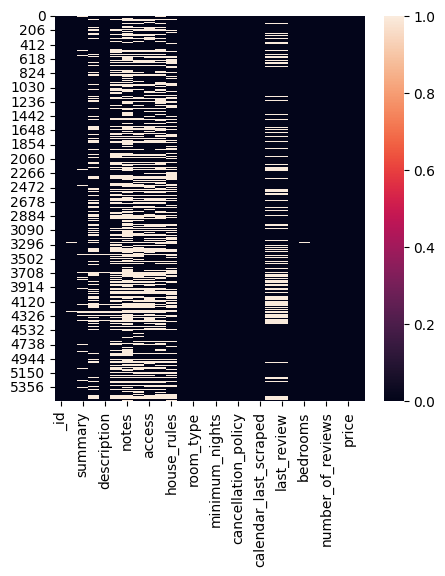

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

##### Removing the Duplicates if any

In [14]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

##### Drop unnecessary columns

In [15]:
df.drop(['_id', 'summary', 'space', 'description', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'first_review', 'last_review'  ], axis=1,inplace=True)

In [16]:
df.isnull().sum()

name                        8
neighborhood_overview    2241
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
accommodates                0
bedrooms                    5
beds                       13
number_of_reviews           0
bathrooms                  10
price                       0
address.street              0
dtype: int64

<Axes: >

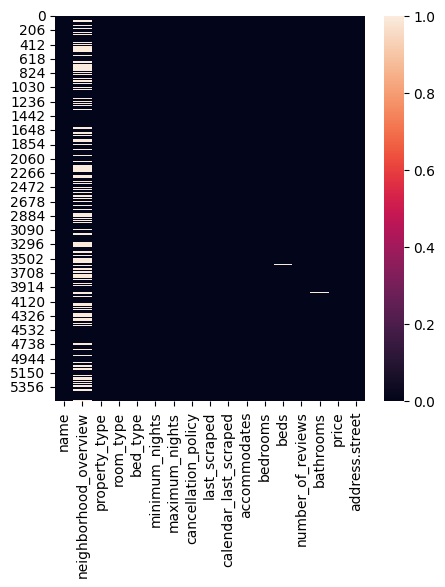

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [18]:
df.fillna({'number_of_reviews':0}, inplace=True)
#examing changes
df.number_of_reviews.isnull().sum()

0

##### Remove the NaN values from the dataset

In [19]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 5554
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   3306 non-null   object 
 1   neighborhood_overview  3306 non-null   object 
 2   property_type          3306 non-null   object 
 3   room_type              3306 non-null   object 
 4   bed_type               3306 non-null   object 
 5   minimum_nights         3306 non-null   int64  
 6   maximum_nights         3306 non-null   int64  
 7   cancellation_policy    3306 non-null   object 
 8   last_scraped           3306 non-null   object 
 9   calendar_last_scraped  3306 non-null   object 
 10  accommodates           3306 non-null   int64  
 11  bedrooms               3306 non-null   float64
 12  beds                   3306 non-null   float64
 13  number_of_reviews      3306 non-null   int64  
 14  bathrooms              3306 non-null   float64
 15  price    

In [20]:
df.columns

Index(['name', 'neighborhood_overview', 'property_type', 'room_type',
       'bed_type', 'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'accommodates', 'bedrooms',
       'beds', 'number_of_reviews', 'bathrooms', 'price', 'address.street'],
      dtype='object')

<Axes: >

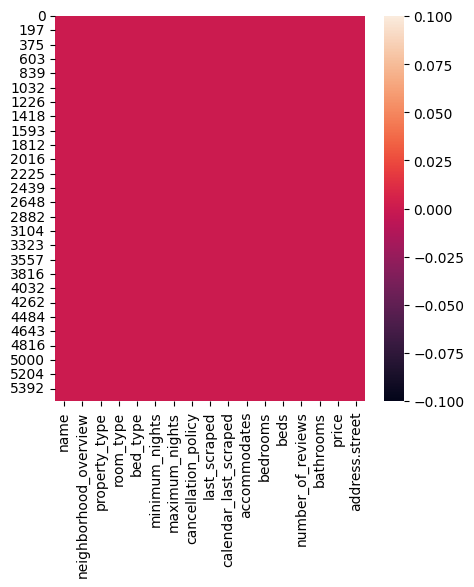

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [22]:
df.isnull().sum()/df.shape[0]*100

name                     0.0
neighborhood_overview    0.0
property_type            0.0
room_type                0.0
bed_type                 0.0
minimum_nights           0.0
maximum_nights           0.0
cancellation_policy      0.0
last_scraped             0.0
calendar_last_scraped    0.0
accommodates             0.0
bedrooms                 0.0
beds                     0.0
number_of_reviews        0.0
bathrooms                0.0
price                    0.0
address.street           0.0
dtype: float64

In [23]:
df.to_csv(r"C:\Users\hp.MUKESH-LF4B6N6\Desktop\NewAirbnb.csv")

In [24]:
list(df['room_type'].unique())

['Entire home/apt', 'Private room', 'Shared room']

In [25]:
df['room_type'].value_counts()

room_type
Entire home/apt    2192
Private room       1080
Shared room          34
Name: count, dtype: int64

# EDA(Exploratory Data Analysis)

In [26]:
df.describe()

,minimum_nights,maximum_nights,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price
count,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,5.584997,1.023695e+06,3.630369,1.436479,2.118572,34.988203,1.301270,265.591954
std,26.157238,4.307535e+07,2.292810,0.990906,1.611937,54.480311,0.694464,973.393251
min,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,4.000000e+01,2.000000,1.000000,1.000000,2.000000,1.000000,70.000000
50%,2.000000,1.125000e+03,3.000000,1.000000,2.000000,12.000000,1.000000,125.000000
75%,3.000000,1.125000e+03,4.000000,2.000000,3.000000,45.000000,1.000000,250.000000
max,1250.000000,2.147484e+09,16.000000,10.000000,18.000000,533.000000,9.000000,48842.000000


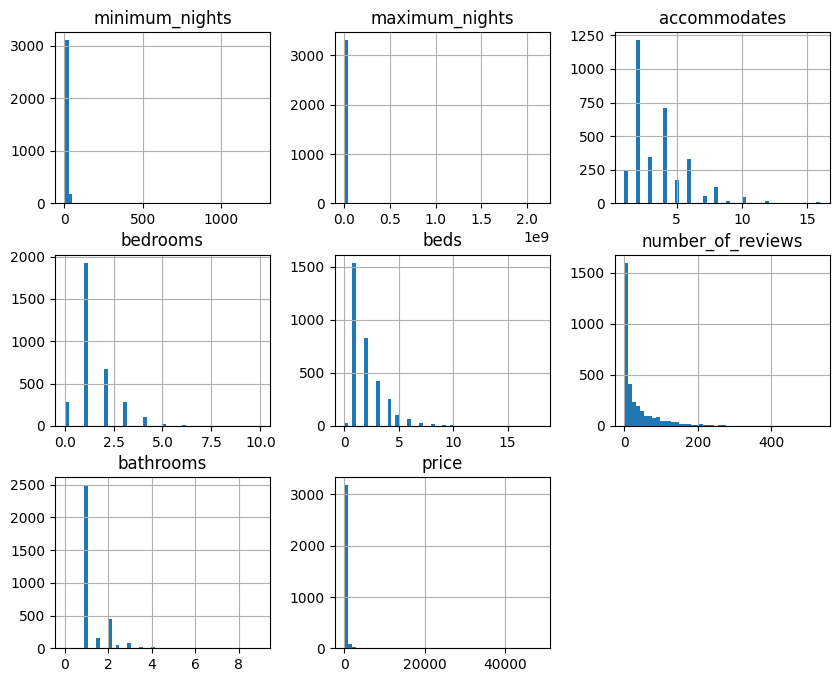

In [27]:
df.hist(bins=50, figsize=(10,8)) 
plt.show()

##### Assuming you have a DataFrame called 'df' with a 'price' column

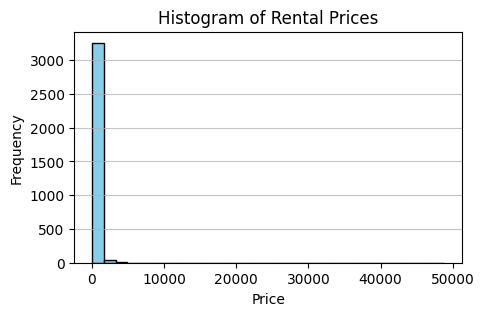

In [28]:
# Assuming you have a DataFrame called 'df' with a 'price' column
plt.figure(figsize=(5, 3))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


##### Assuming you have a DataFrame called 'df' with 'price' and 'room_type' columns

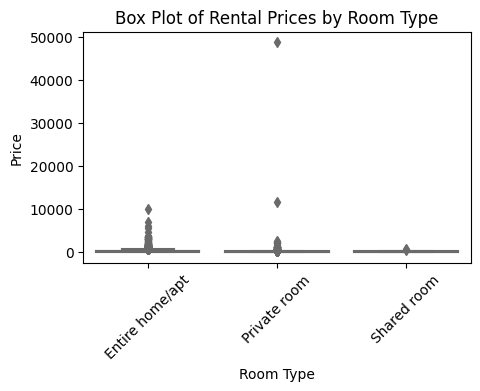

In [29]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='room_type', y='price', data=df, palette='Set3')
plt.title('Box Plot of Rental Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


##### Assuming you have a DataFrame called 'df' with 'price' and 'accommodates' columns

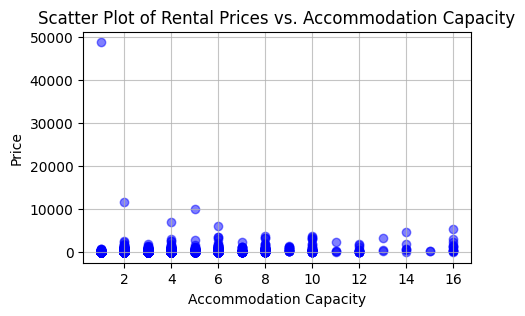

In [30]:
plt.figure(figsize=(5, 3))
plt.scatter(df['accommodates'], df['price'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Rental Prices vs. Accommodation Capacity')
plt.xlabel('Accommodation Capacity')
plt.ylabel('Price')
plt.grid(axis='both', alpha=0.75)
plt.show()


In [31]:
room_price_area_wise = df.groupby(['neighborhood_overview', 'room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by = 'price', ascending = False).head(10)

,neighborhood_overview,room_type,price
1897,Safe and good located gay freindly area.,Private room,48842.0
3190,"旺角位于九龙半岛的北部,著名的弥敦道贯穿其中,这里是香港人气最旺盛的地区之一,潮流时尚､传统...",Private room,11681.0
3216,"邻近庙街,旺角,朗豪坊,美食及观光景点应有尽有 Near Temple Street, Mo...",Entire home/apt,10001.0
3104,see stunning quite area pictures...,Entire home/apt,7002.0
1546,O bairro mais alegre do Rio de Janeiro. Viva a...,Entire home/apt,6002.0
331,"Belezas naturais, incriveis praias, shopping c...",Entire home/apt,5502.0
2799,Villa GOK is located in most prestige's area E...,Entire home/apt,4745.0
137,A praia fica a 3 quadras da casa e a Lagoa tb ...,Entire home/apt,3730.0
1319,MAR,Entire home/apt,3726.0
2376,"The location of the apartment is explendid, 3 ...",Entire home/apt,3544.0


In [32]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['minimum_nights']=df.iloc[:,3]
df_rich_hosts['maximum_nights ']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

,name,neighborhood_overview,minimum_nights,maximum_nights,room_type,price
0,Ribeira Charming Duplex,"In the neighborhood of the river, you can find...",Entire home/apt,Real Bed,2,30
1,Horto flat with small garden,This charming ground floor flat is located in ...,Entire home/apt,Real Bed,2,1125
2,Ocean View Waikiki Marina w/prkg,You can breath ocean as well as aloha.,Entire home/apt,Real Bed,3,365
5,New York City - Upper West Side Apt,Great neighborhood - many terrific restaurants...,Private room,Real Bed,12,360
6,Copacabana Apartment Posto 6,Copacabana in the South zone is the district t...,Entire home/apt,Real Bed,3,75


In [33]:
df.price.isna().sum()

0

In [34]:
df['price'].describe()

count     3306.000000
mean       265.591954
std        973.393251
min          9.000000
25%         70.000000
50%        125.000000
75%        250.000000
max      48842.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

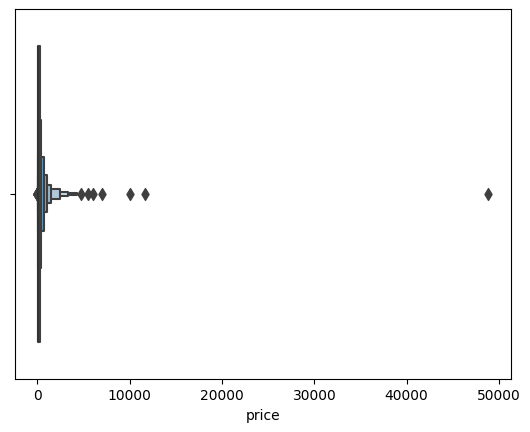

In [35]:
figsize=(12,8)
sns.boxenplot(x='price',data=df)

In [36]:
df.columns

Index(['name', 'neighborhood_overview', 'property_type', 'room_type',
       'bed_type', 'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'accommodates', 'bedrooms',
       'beds', 'number_of_reviews', 'bathrooms', 'price', 'address.street'],
      dtype='object')

## Price Analysis and Visualization

#### Create a histogram of prices

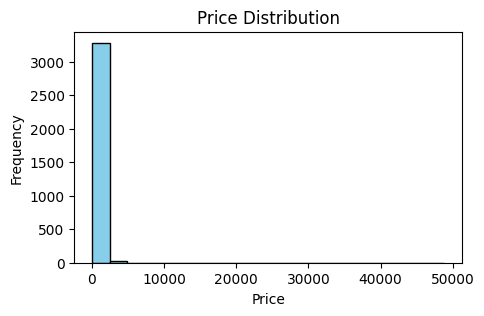

In [37]:
plt.figure(figsize=(5, 3))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Scatter plot of price vs. number_of_reviews

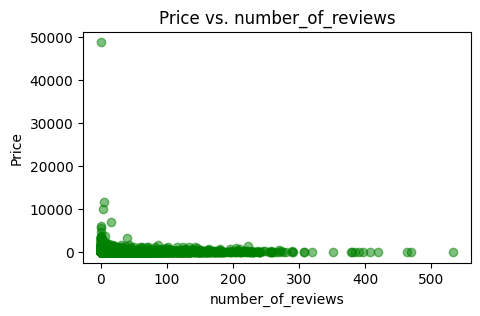

In [38]:
plt.figure(figsize=(5, 3))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, color='green')
plt.title('Price vs. number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('Price')
plt.show()


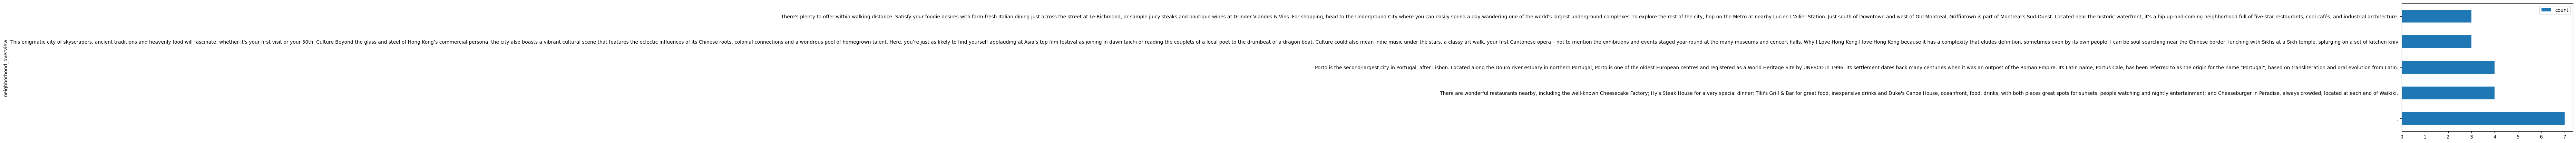

In [39]:
df5 = df.groupby('neighborhood_overview')[['neighborhood_overview','name']].agg(['count']
)['name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(5).plot(kind='barh')
plt.show()
#pd.DataFrame(df5.head(5))

## vailability Analysis by Season:

#### Data Preprocessing

In [40]:
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])


In [41]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['calendar_last_scraped'].dt.month.apply(get_season)

#### Availability Analysis by Season

In [42]:
# Count the number of listings in each season
season_counts = df['season'].value_counts()
season_counts 

season
Spring    2342
Winter     964
Name: count, dtype: int64

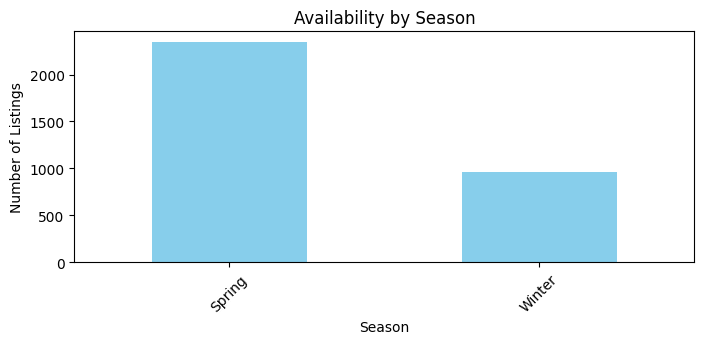

In [43]:
# Create a bar chart to visualize the availability by season
plt.figure(figsize=(8, 3))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Availability by Season')
plt.xlabel('Season')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


#### Availability Analysis by Season

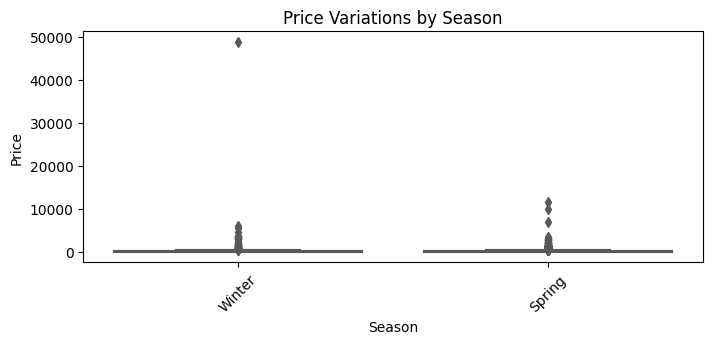

In [44]:
# Create a box plot to visualize price variations by season
plt.figure(figsize=(8, 3))
sns.boxplot(x='season', y='price', data=df, palette='Set2')
plt.title('Price Variations by Season')
plt.xlabel('Season')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


#### Average number_of_reviews by Season

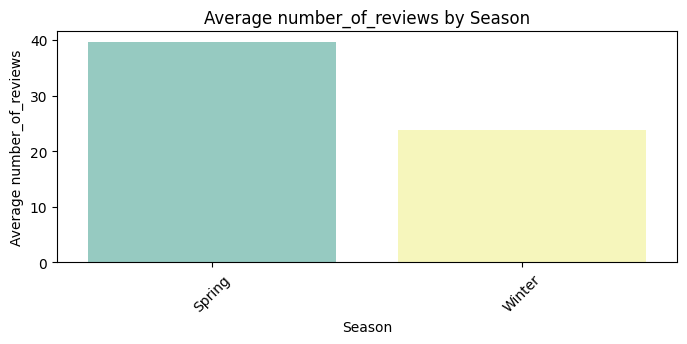

In [45]:
# Calculate average number_of_reviews by season
average_number_of_reviews_by_season = df.groupby('season')['number_of_reviews'].mean().reset_index()

# Create a bar chart to visualize average number_of_reviews by season
plt.figure(figsize=(8, 3))
sns.barplot(x='season', y='number_of_reviews', data=average_number_of_reviews_by_season, palette='Set3')
plt.title('Average number_of_reviews by Season')
plt.xlabel('Season')
plt.ylabel('Average number_of_reviews')
plt.xticks(rotation=45)
plt.show()

#### Interactive Visualizations with Plotly

In [46]:
# Create an interactive bar chart for average number_of_reviews by season using Plotly
fig = px.bar(average_number_of_reviews_by_season, x='season', y='number_of_reviews', title='Average number_of_reviews by Season')
fig.update_xaxes(title='Season')
fig.update_yaxes(title='Average number_of_reviews')
fig.update_traces(marker_color='royalblue')
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()